# Linear Regression with Moor-Penrose pseudoinverse 

> by Daniel Marostica

From Singular Value Decomposition

$X = UDV^T$

where 
- $U$: left-singular vectors matrix of $X$;
- $V$: right-singular vectors matrix of $X$;
- $D$: singular values of $X$.

Taking $y = wX$, if we want to find the weights vector $w$, we can use the Moor-Penrose pseudoinverse matrix

$X^+ = VD^+U^T$

to derive $w = X^+y$.

In [42]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Creating Dataset

In [52]:
X = torch.tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9.]]).T # both unit vector and transposition are necessary
X

tensor([[1., 0.],
        [1., 1.],
        [1., 2.],
        [1., 3.],
        [1., 4.],
        [1., 5.],
        [1., 6.],
        [1., 7.],
        [1., 8.],
        [1., 9.]])

Adding noise to an arbitrary linear function $y = b + w X$

In [53]:
y = 5 - 10 * X[:, 1] + torch.normal(mean=torch.zeros(len(X[:, 1])), std=2)
y

tensor([  7.5713,  -9.1221, -15.3132, -25.1535, -34.4662, -46.6266, -56.2901,
        -63.4219, -75.6490, -84.9489])

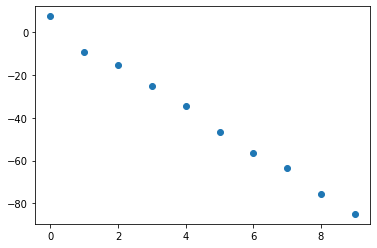

In [54]:
plt.plot(X[:, 1], y, 'o')

## Getting the pseudoinverse

In [56]:
X_plus = torch.pinverse(X)
X_plus

tensor([[ 0.3455,  0.2909,  0.2364,  0.1818,  0.1273,  0.0727,  0.0182, -0.0364,
         -0.0909, -0.1455],
        [-0.0545, -0.0424, -0.0303, -0.0182, -0.0061,  0.0061,  0.0182,  0.0303,
          0.0424,  0.0545]])

Applying  $w = X^+y$, which returns a vector containing both the **intercept** and the **slope**

In [65]:
b, w = torch.matmul(X_plus, y)
print(b, w)

tensor(4.5075) tensor(-9.9666)


## Plotting results

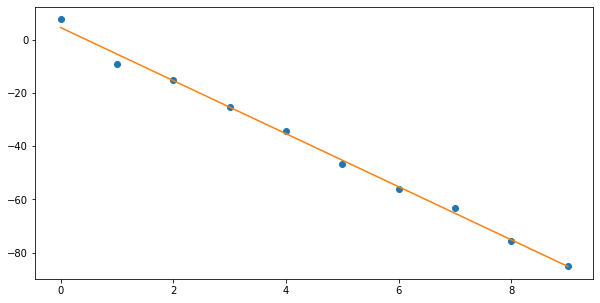

In [63]:
plt.figure(figsize=(10,5))
plt.plot(X[:, 1], y, 'o')
plt.plot(X[:, 1], b + w * X[:, 1])